In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap

/home/drosophila-lab/Documents/Genomics Project/snp-data/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load data
print('Before loading data.')
df = pd.read_csv("SNP_CSV.csv")
print('Finished loading data.')

# Feature engineering - create trajectory features
freq_cols = ['Freq1', 'Freq2', 'Freq3', 'Freq4']
X = df[freq_cols].values

print("here1")

Before loading data.
Finished loading data.
here1


In [3]:
#  Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("here2")

here2


In [4]:
# # Dimensionality Reduction with t-SNE (alternative) **
# # tsne = TSNE(n_components=2, perplexity=2)
# # X_tsne = tsne.fit_transform(X_scaled)

# reducer = umap.UMAP(random_state=42)
# embedding = reducer.fit_transform(X_scaled)
# embedding.shape

# print("here3")

In [ ]:
# Clustering with K-Means ** (idk if this will be correct)
kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming single population (CACO)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("here4")

here4


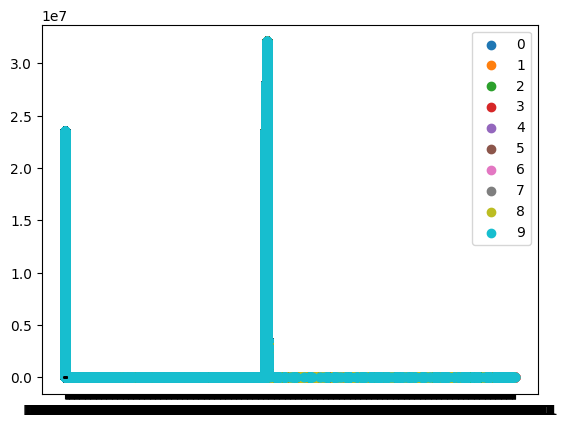

In [ ]:
# Visualization
# import matplotlib.pyplot as plt
 
# #filter rows of original data
# filtered_label0 = df[label == 0]

# print(filtered_label0)
 
# #plotting the results
# plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1])
# plt.show()

#Getting the Centroids
centroids = kmeans.cluster_centers_
# u_labels = np.unique(df['Cluster'])
 
#plotting the results:
 
# for i in u_labels:
#     filtered_label0 = df[label == i]
#     plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1], label=i)
# plt.scatter(centroids[:,0] , centroids[:,1] , s = 1, color = 'k')
# plt.legend()
# plt.show()

In [14]:
np.unique(label)
print(df[1:10])
print(label[1:10])
print(df[label == 2])

  Chr  Pos  Sel   Pop  Evolving     Freq1     Freq2     Freq3     Freq4
1   X  221    2  CACO     False  0.853982  0.885106  0.883721  0.965714
2   X  221    3  CACO     False  0.975248  0.956098  0.903846  0.950495
3   X  221    4  CACO     False  0.814815  0.854962  0.941176  0.952586
4   X  221    5  CACO     False  0.873096  0.893939  0.870270  0.950893
5   X  221    1   CAO     False  0.878788  0.918605  0.893258  0.950920
6   X  221    2   CAO     False  0.848739  0.901709  0.878788  0.964497
7   X  221    3   CAO     False  0.947090  0.924779  0.932961  0.961326
8   X  221    4   CAO     False  0.884058  0.917808  0.831395  0.932692
9   X  221    5   CAO     False  0.922222  0.910377  0.908676  0.890110
[5 0 8 5 0 5 0 5 0]
                 Chr    Pos  Sel   Pop  Evolving     Freq1     Freq2  \
20                 X    336    1  CACO     False  0.719298  0.707921   
30                 X    336    1  NACO     False  0.784232  0.614286   
38                 X    336    4  ANCO     F

In [7]:
# PCA Plot
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Pop'], ax=axes[0])
axes[0].set_title('PCA Projection')

print("here6")

here6


In [8]:
# t-SNE Plot
# sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Pop'], ax=axes[1])
# axes[1].set_title('t-SNE Projection')

# UMAP Plot
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     # c=[sns.color_palette()[x] for x in X.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
# )
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the dataset', fontsize=24)


# plt.savefig("clustervis1")
# mapper = umap.UMAP().fit(X)
# umap.plot.points(mapper)
# umap.plot.points(mapper, labels=fmnist.target, theme='fire')
# umap.plot.points(mapper)


In [9]:
print("here7")

# Frequency Trajectory Plot (VISUAL)
for i, row in df.iterrows():
    axes[2].plot(freq_cols, row[freq_cols], label=f"Sample {i+1}")
axes[2].set_title('Frequency Trajectories')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.savefig("clustervis2")

here7


KeyboardInterrupt: 

In [10]:
# Prediction function for new data (for inference)
def predict_population(new_frequencies):
    new_data = scaler.transform([new_frequencies])
    cluster = kmeans.predict(new_data)[0]
    # In a real multi-population scenario, I would map clusters to populations
    # For now, just return cluster ID
    return f"Cluster {cluster}"

In [13]:
# Example usage
new_sample = [0, 0, 0, 0]
print(f"Predicted cluster: {predict_population(new_sample)}")

Predicted cluster: Cluster 0
